No handles with labels found to put in legend.


standard error 0.7947546038224522
confidence interval (1.2647874418899911, 3.5387346897992558)


0.7947546038224522

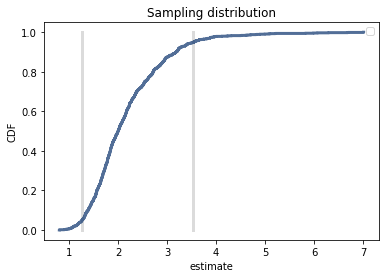

In [12]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import random
import thinkstats2
import thinkplot
# Solution

def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

def SimulateSample(lam=2, n=10, iters=1000):
    """Sampling distribution of L as an estimator of exponential parameter.

    lam: parameter of an exponential distribution
    n: sample size
    iters: number of iterations
    """
    def VertLine(x, y=1):
        thinkplot.Plot([x, x], [0, y], color='0.8', linewidth=3)

    estimates = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        lamhat = 1.0 / np.mean(xs)
        estimates.append(lamhat)

    stderr = RMSE(estimates, lam)
    print('standard error', stderr)

    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print('confidence interval', ci)
    VertLine(ci[0])
    VertLine(ci[1])

    # plot the CDF
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='estimate',
                     ylabel='CDF',
                     title='Sampling distribution')

    return stderr

SimulateSample()


In [ ]:
 My conclusions:

# 1) With sample size 10:

#standard error 0.7947546038224522
#confidence interval (1.2647874418899911, 3.5387346897992558)

# 2) As sample size increases, standard error and the width of
#    the CI decrease:

# All three confidence intervals contain the actual value, 2.